In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd 
import scipy as sp
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("darkgrid")

# Halo Mass Function 
We used the online HMF calculator to get the halo mass distribution at different redshift (website: http://hmf.icrar.org)

In here, we extract the data of halo mass function when $z = 0.5, 2, 4$. The data is shown as below. With the data of comoving number density of halo mass per unit mass and corresponding halo mass at certain redshift, we may use this information to calculate the total lensing cross-section. In here, we used Pandas to read the files which are downloaded in HMFcalc. 

In [2]:
hmf_00= pd.read_csv("z_00.txt",skiprows=range(12), sep=' ',
            names=['m', 'sigma', 'ln(1/sigma)', 'n_eff', 'f(sigma)', 'dn/dm', 'dn/dlnm', 'dn/dlog10m', 'n(>m)',
                   'rho(>m)', 'rho(<m)', 'Lbox(N=1)'])

# hmf_05= pd.read_csv("z_05.txt",skiprows=range(12), sep=' ',
#             names=['m', 'sigma', 'ln(1/sigma)', 'n_eff', 'f(sigma)', 'dn/dm', 'dn/dlnm', 'dn/dlog10m', 'n(>m)',
#                    'rho(>m)', 'rho(<m)', 'Lbox(N=1)'])


# hmf_10= pd.read_csv("z_10.txt",skiprows=range(12), sep=' ',
#             names=['m', 'sigma', 'ln(1/sigma)', 'n_eff', 'f(sigma)', 'dn/dm', 'dn/dlnm', 'dn/dlog10m', 'n(>m)',
#                    'rho(>m)', 'rho(<m)', 'Lbox(N=1)'])

# hmf_15= pd.read_csv("z_15.txt",skiprows=range(12), sep=' ',
#             names=['m', 'sigma', 'ln(1/sigma)', 'n_eff', 'f(sigma)', 'dn/dm', 'dn/dlnm', 'dn/dlog10m', 'n(>m)',
#                    'rho(>m)', 'rho(<m)', 'Lbox(N=1)'])

# hmf_20= pd.read_csv("z_20.txt",skiprows=range(12), sep=' ',
#             names=['m', 'sigma', 'ln(1/sigma)', 'n_eff', 'f(sigma)', 'dn/dm', 'dn/dlnm', 'dn/dlog10m', 'n(>m)',
#                    'rho(>m)', 'rho(<m)', 'Lbox(N=1)'])

# hmf_25= pd.read_csv("z_25.txt",skiprows=range(12), sep=' ',
#             names=['m', 'sigma', 'ln(1/sigma)', 'n_eff', 'f(sigma)', 'dn/dm', 'dn/dlnm', 'dn/dlog10m', 'n(>m)',
#                    'rho(>m)', 'rho(<m)', 'Lbox(N=1)'])

# hmf_30= pd.read_csv("z_30.txt",skiprows=range(12), sep=' ',
#             names=['m', 'sigma', 'ln(1/sigma)', 'n_eff', 'f(sigma)', 'dn/dm', 'dn/dlnm', 'dn/dlog10m', 'n(>m)',
#                    'rho(>m)', 'rho(<m)', 'Lbox(N=1)'])

# hmf_35= pd.read_csv("z_35.txt",skiprows=range(12), sep=' ',
#             names=['m', 'sigma', 'ln(1/sigma)', 'n_eff', 'f(sigma)', 'dn/dm', 'dn/dlnm', 'dn/dlog10m', 'n(>m)',
#                    'rho(>m)', 'rho(<m)', 'Lbox(N=1)'])

# hmf_40= pd.read_csv("z_40.txt",skiprows=range(12), sep=' ',
#             names=['m', 'sigma', 'ln(1/sigma)', 'n_eff', 'f(sigma)', 'dn/dm', 'dn/dlnm', 'dn/dlog10m', 'n(>m)',
#                    'rho(>m)', 'rho(<m)', 'Lbox(N=1)'])

# hmf_45= pd.read_csv("z_45.txt",skiprows=range(12), sep=' ',
#             names=['m', 'sigma', 'ln(1/sigma)', 'n_eff', 'f(sigma)', 'dn/dm', 'dn/dlnm', 'dn/dlog10m', 'n(>m)',
#                    'rho(>m)', 'rho(<m)', 'Lbox(N=1)'])

# hmf_50= pd.read_csv("z_50.txt",skiprows=range(12), sep=' ',
#             names=['m', 'sigma', 'ln(1/sigma)', 'n_eff', 'f(sigma)', 'dn/dm', 'dn/dlnm', 'dn/dlog10m', 'n(>m)',
#                    'rho(>m)', 'rho(<m)', 'Lbox(N=1)'])

In [3]:
m_00 = hmf_00["m"]
dndm_00 = hmf_00["dn/dm"]
dndlnm_00 = hmf_00["dn/dlnm"]

In [9]:
def dlnm(m):
    dM = np.append(np.array([np.log(m[i+1])-np.log(m[i]) for i in range(0,len(m)-1)]), np.array([np.log(m[11])-np.log(m[10])]))
    return dM

def dm(m):
    dM = np.append(np.array([m[i+1]-m[i] for i in range(0,len(m)-1)]), np.array([0]))
    return dM

In [10]:
dndm_00*dm(m_00)

0     2.484550e-02
1     2.244066e-02
2     2.026891e-02
3     1.830895e-02
4     1.653967e-02
          ...     
95    2.460775e-07
96    1.905228e-07
97    1.456581e-07
98    1.098776e-07
99    0.000000e+00
Name: dn/dm, Length: 100, dtype: float64

In [11]:
dndlnm_00*dlnm(m_00)

0     2.344272e-02
1     2.117366e-02
2     1.912452e-02
3     1.727522e-02
4     1.560584e-02
          ...     
95    2.321839e-07
96    1.797658e-07
97    1.374342e-07
98    1.036739e-07
99    7.705328e-08
Name: dn/dlnm, Length: 100, dtype: float64

In [14]:
# Halo mass and its comoving number density per mass at z= 0.1
# m_00 = hmf_00["m"]
# dndm_00 = hmf_00["dn/dm"]

# m_05 = hmf_05["m"]
# dndm_05 = hmf_05["dn/dm"]

# m_10 = hmf_10["m"]
# dndm_10 = hmf_10["dn/dm"]

# m_15 = hmf_15["m"]
# dndm_15 = hmf_15["dn/dm"]

# m_20 = hmf_20["m"]
# dndm_20 = hmf_00["dn/dm"]

# m_25 = hmf_25["m"]
# dndm_25 = hmf_25["dn/dm"]

# m_30 = hmf_30["m"]
# dndm_30 = hmf_30["dn/dm"]

# m_35 = hmf_35["m"]
# dndm_35 = hmf_35["dn/dm"]

# m_40 = hmf_40["m"]
# dndm_40 = hmf_40["dn/dm"]

# m_45 = hmf_45["m"]
# dndm_45 = hmf_45["dn/dm"]

# m_50 = hmf_50["m"]
# dndm_50 = hmf_50["dn/dm"]

In [105]:
# Astropy testing total lensing cross section 
import astropy 
from astropy.constants import c, G
from astropy.cosmology import FlatLambdaCDM, z_at_value
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70*u.km/u.s/u.Mpc, Om0=0.3)
H_0 = cosmo.H(0)

def Hubble(z): 
    return H_0*np.sqrt(0.3*(1+z)**3 + 0.7)

#Assume Virial mass
def r_200(m,z): 
    return (m*G/(100*Hubble(z)**2))**(1/3)

# Differential Mass
def dm(m):
    dM = np.append(np.array([0]),np.array([m[i+1]-m[i] for i in range(0,len(m)-1)]))
    return dM

# total lensing cross secion ( treat mu_{0} is constant )
def total_cross_sec(m,dndm,zl,zs):
    # append dm for correction 
    # append the constant in front of cross-section (28/4)
    cross_sec = (8*np.pi**3*G**2*c**-4)*dm(m)*dndm*(m/r_200(m=m,z=zl)*(cosmo.angular_diameter_distance_z1z2(zl,zs)/cosmo.angular_diameter_distance(zs)))**2
    return np.sum(np.asarray(cross_sec))


# Maginification of Gravotational waves 
def mu_gw(zs):
    # zs > 0.3 by computation
    return (cosmo.luminosity_distance(zs)/cosmo.luminosity_distance(0.1))**2 

# with magnification lensing cross-sec
def cs_source(m,dndm,zl,zs):
    return np.array([mu_gw(i)**-4*total_cross_sec(m,dndm,zl,i) for i in zs])

def cs_image(m,dndm,zl,zs):
    return np.array([mu_gw(i)**-2*total_cross_sec(m,dndm,zl,i) for i in zs])

In [106]:
# Source of lensed Gws 
zs = 10

In [107]:
m = np.asarray([m_00,m_05,m_10, m_15,m_20,m_25,m_30,m_35,m_40,m_45,m_50])
dndm = np.asarray([dndm_00, dndm_05,dndm_10, dndm_15,dndm_20,dndm_25,dndm_30,dndm_35,dndm_40,dndm_45,dndm_50])


In [108]:
def cs_total_zL(m,dndm,zs):
    cs = np.zeros(100)
    for i in range(0,len(m)):
        cs += cs_image(m[i],dndm[i],0.5*(i+1),zs)
    return cs

In [100]:
#cs_total_zL(m = m,dndm =dndm,zs = np.linspace(0.01,zs,100))

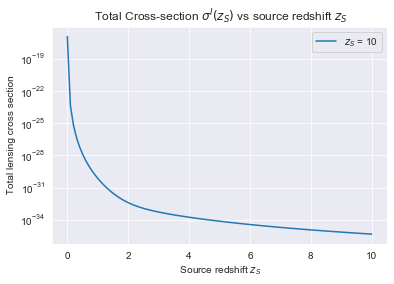

In [110]:
plt.title(r" Total Cross-section $\sigma^{I}(z_{S})$ vs source redshift $z_{S}$")
plt.ylabel(r" Total lensing cross section")
plt.xlabel(r" Source redshift $z_{S}$")

plt.plot(np.linspace(0,zs,100), cs_total_zL(m = m,dndm =dndm,zs = np.linspace(0.01,zs,100)), label=r"$z_{S}$ = 10")
plt.yscale("log")
plt.legend()
plt.savefig("total_cross_sec_all_zl.pdf")